# Explore here

In [1]:
import pandas as pd
import numpy as np
import re
import nltk
from nltk.tokenize import word_tokenize
from unidecode import unidecode
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from tqdm import tqdm
tqdm.pandas()
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [1]:


total_data = pd.read_csv("https://raw.githubusercontent.com/4GeeksAcademy/NLP-project-tutorial/main/url_spam.csv")
total_data.head()

,url,is_spam
0,https://briefingday.us8.list-manage.com/unsubs...,True
1,https://www.hvper.com/,True
2,https://briefingday.com/m/v4n3i4f3,True
3,https://briefingday.com/n/20200618/m#commentform,False
4,https://briefingday.com/fan,True


In [2]:
#convertimos la columna numerica a entrea true = 1 false = 0
total_data['is_spam'] = total_data['is_spam'].astype(int)
total_data.head()

,url,is_spam
0,https://briefingday.us8.list-manage.com/unsubs...,1
1,https://www.hvper.com/,1
2,https://briefingday.com/m/v4n3i4f3,1
3,https://briefingday.com/n/20200618/m#commentform,0
4,https://briefingday.com/fan,1


In [3]:
total_data['is_spam'].value_counts()

is_spam
0    2303
1     696
Name: count, dtype: int64

In [4]:
print(f"Nulos:{total_data.isna().sum()}")
print(f"duplicados : {total_data.duplicated().sum()}")


Nulos:url        0
is_spam    0
dtype: int64
duplicados : 630


In [5]:
total_data = total_data.drop_duplicates()

In [6]:
total_data['is_spam'].value_counts()


is_spam
0    2125
1     244
Name: count, dtype: int64

Podemos ver que los datos no estan balanceados tenemos 2125 datos de control y apenas 244 que son spam

me di el trabajo de buscar otro dataset que contenga link  clasificados de igual manera para agregar link qeu sean spam y  balancear los datos 

In [8]:
spam_df = pd.read_csv(r'C:\Users\jdean\OneDrive\Escritorio\pythonmysql\NPL_JOEL\url_spam_classification.csv')

In [10]:
spam_df['is_spam'] = spam_df['is_spam'].astype(int)

In [15]:
spam_df = spam_df.drop_duplicates()


In [16]:
spam_df['is_spam'].value_counts()

is_spam
0    84796
1     2785
Name: count, dtype: int64

In [18]:
spam_df = spam_df[spam_df['is_spam'] == 1]


In [23]:
spam_df = spam_df.sample(1900)

In [24]:
total_data = pd.concat([total_data, spam_df], ignore_index=True)

In [25]:
total_data['is_spam'].value_counts()


is_spam
1    2144
0    2125
Name: count, dtype: int64

In [26]:
print(f"Nulos:{total_data.isna().sum()}")
print(f"duplicados : {total_data.duplicated().sum()}")

Nulos:url        0
is_spam    0
dtype: int64
duplicados : 168


In [28]:
total_data = total_data.drop_duplicates()
print(f"duplicados : {total_data.duplicated().sum()}")

duplicados : 0


In [29]:
total_data['is_spam'].value_counts()

is_spam
0    2125
1    1976
Name: count, dtype: int64

Ahora tenemos un dataframe balanceado 

In [5]:
total_data.to_csv(r'C:\Users\jdean\OneDrive\Escritorio\pythonmysql\NPL_JOEL\url_spam_Ejercicio.csv', index=False)

NameError: name 'total_data' is not defined

In [12]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /home/vscode/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /home/vscode/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /home/vscode/nltk_data...


True

In [2]:
df = pd.read_csv(r"/workspaces/NPL_JOEL/data/interim/url_spam_Ejercicio.csv")
df

,url,is_spam
0,https://briefingday.us8.list-manage.com/unsubs...,1
1,https://www.hvper.com/,1
2,https://briefingday.com/m/v4n3i4f3,1
3,https://briefingday.com/n/20200618/m#commentform,0
4,https://briefingday.com/fan,1
...,...,...
4096,https://www.platformer.news/subscribe,1
4097,https://theprofile.substack.com/,1
4098,https://karacutruzzula.us14.list-manage.com/un...,1
4099,http://us18.forward-to-friend.com/forward,1


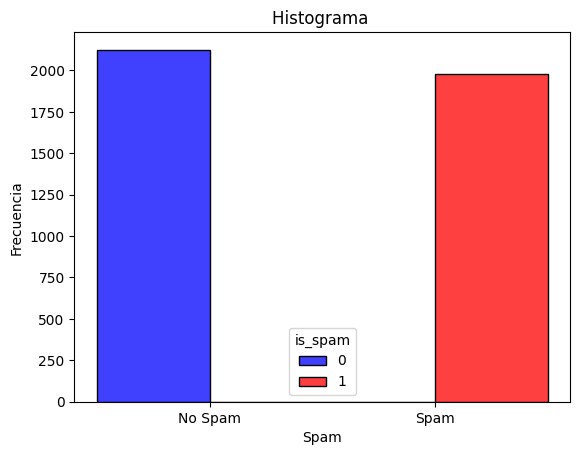

In [3]:
import seaborn as sns

sns.histplot(data=df, x='is_spam', bins=[-0.5, 0.5, 1.5], hue='is_spam', palette={0: 'blue', 1: 'red'}, multiple='dodge', edgecolor='black')
plt.xlabel('Spam')
plt.ylabel('Frecuencia')
plt.title('Histograma ')
plt.xticks([0, 1],['No Spam', 'Spam']),  # Establecer los límites del eje x para que solo muestre 0 y 1
plt.show()

Sacamos caracteristicas a ver si son representativas 

In [4]:
#agregamos columnas para ver si como se comportan estos caracteres especiales y que tengan un valor para el modelo antes de limpiarlo
df['contains_subscribe'] = df['url'].apply(lambda x : 1 if "subscribe" in x else 0)
df['contains_hash'] = df['url'].apply(lambda x : 1 if "#" in x else 0)
df['non_https'] = df['url'].apply(lambda x : 1 if "https" in x else 0)
df['contains_?'] = df['url'].apply(lambda x : 1 if "?" in x else 0)
df['contains_www'] = df['url'].apply(lambda x : 1 if "www" in x else 0)
df.head()

,url,is_spam,contains_subscribe,contains_hash,non_https,contains_?,contains_www
0,https://briefingday.us8.list-manage.com/unsubs...,1,1,0,1,0,0
1,https://www.hvper.com/,1,0,0,1,0,1
2,https://briefingday.com/m/v4n3i4f3,1,0,0,1,0,0
3,https://briefingday.com/n/20200618/m#commentform,0,0,1,1,0,0
4,https://briefingday.com/fan,1,0,0,1,0,0


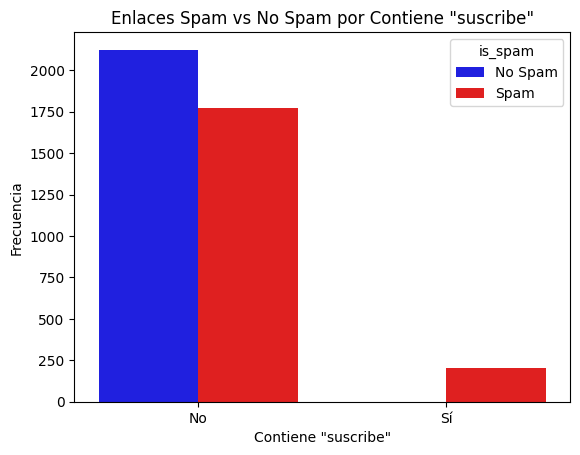

In [5]:
# Gráfico de barras agrupadas
sns.countplot(data=df, x='contains_subscribe', hue='is_spam', palette={0: 'blue', 1: 'red'})
plt.xlabel('Contiene "suscribe"')
plt.ylabel('Frecuencia')
plt.title('Enlaces Spam vs No Spam por Contiene "suscribe"')
plt.xticks([0, 1], ['No', 'Sí'])
plt.legend(title='is_spam', labels=['No Spam', 'Spam'])
plt.show()

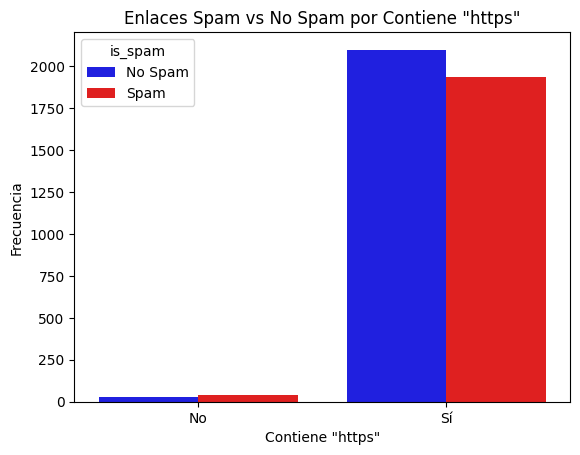

In [6]:
# Gráfico de barras agrupadas
sns.countplot(data=df, x='non_https', hue='is_spam', palette={0: 'blue', 1: 'red'})
plt.xlabel('Contiene "https"')
plt.ylabel('Frecuencia')
plt.title('Enlaces Spam vs No Spam por Contiene "https"')
plt.xticks([0, 1], ['No', 'Sí'])
plt.legend(title='is_spam', labels=['No Spam', 'Spam'])
plt.show()

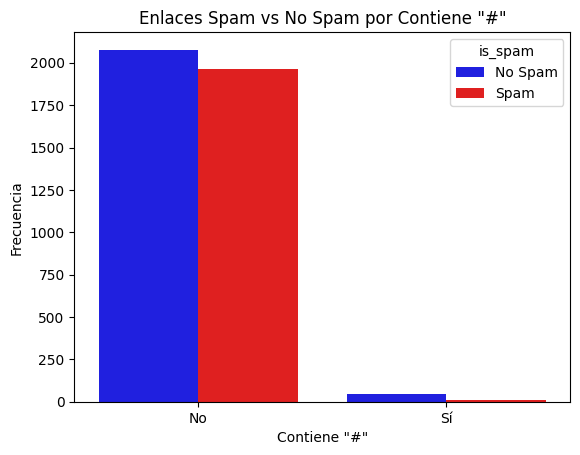

In [7]:
# Gráfico de barras agrupadas
sns.countplot(data=df, x='contains_hash', hue='is_spam', palette={0: 'blue', 1: 'red'})
plt.xlabel('Contiene "#"')
plt.ylabel('Frecuencia')
plt.title('Enlaces Spam vs No Spam por Contiene "#"')
plt.xticks([0, 1], ['No', 'Sí'])
plt.legend(title='is_spam', labels=['No Spam', 'Spam'])
plt.show()

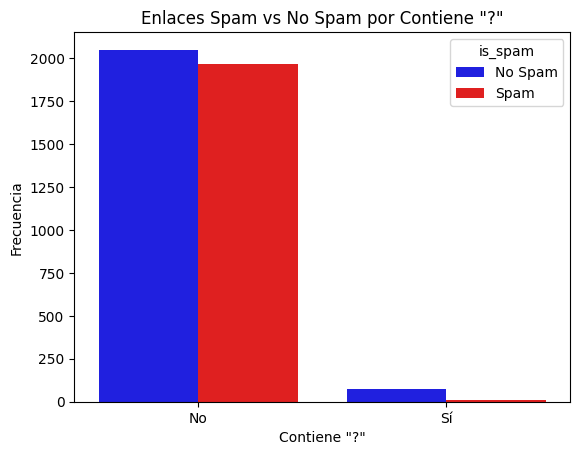

In [8]:
# Gráfico de barras agrupadas
sns.countplot(data=df, x='contains_?', hue='is_spam', palette={0: 'blue', 1: 'red'})
plt.xlabel('Contiene "?"')
plt.ylabel('Frecuencia')
plt.title('Enlaces Spam vs No Spam por Contiene "?"')
plt.xticks([0, 1], ['No', 'Sí'])
plt.legend(title='is_spam', labels=['No Spam', 'Spam'])
plt.show()

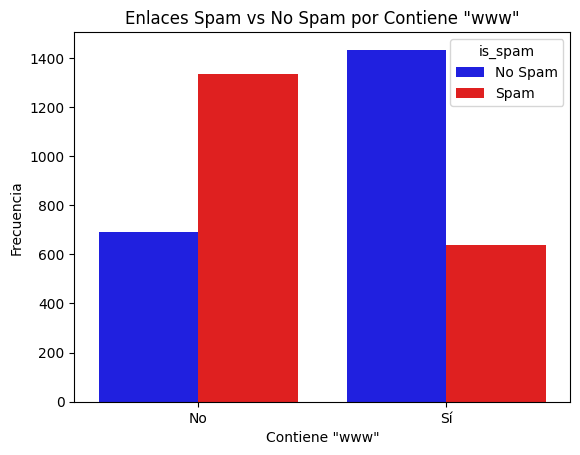

In [9]:
sns.countplot(data=df, x='contains_www', hue='is_spam', palette={0: 'blue', 1: 'red'})
plt.xlabel('Contiene "www"')
plt.ylabel('Frecuencia')
plt.title('Enlaces Spam vs No Spam por Contiene "www"')
plt.xticks([0, 1], ['No', 'Sí'])
plt.legend(title='is_spam', labels=['No Spam', 'Spam'])
plt.show()

In [10]:
#Funcion para procesar el texto
def preprocess(text):
  #lo hacemos minusculas
  text = text.lower()
  #quitamos los valores y limpiamos el texto signos y caracteres que ya tenemos procesados
  text = re.sub(r'(?:http|https|www)', '', text, flags=re.MULTILINE)
  text = re.sub(r'@\w+','',text)
  text = re.sub(r'#\w+','',text)
  text = re.sub(r'[^\w\s]|[\d]', ' ', text)
  text = re.sub(r'\bsuscribe\b', '', text)
  text = re.sub(r'\s+',' ',text).strip()
  #tokenizamos y lemantizamos
  tokens = word_tokenize(text)
  # Eliminación de los acentos
  tokens = [unidecode(token) for token in tokens]
  stop_w = set([unidecode(w) for w in stopwords.words('spanish')])
  tokens = [token for token in tokens if token not in stop_w]
  lematizador = WordNetLemmatizer()
  tokens = [lematizador.lemmatize(token) for token in tokens if len(token)>=3]
  return ' '.join(tokens)

In [11]:
df["url"] = df["url"].apply(preprocess)
df.head()

,url,is_spam,contains_subscribe,contains_hash,non_https,contains_?,contains_www
0,briefingday list manage com unsubscribe,1,1,0,1,0,0
1,hvper com,1,0,0,1,0,1
2,briefingday com,1,0,0,1,0,0
3,briefingday com,0,0,1,1,0,0
4,briefingday com fan,1,0,0,1,0,0


In [12]:
df["url"].duplicated().sum()


160

In [13]:
df = df.drop_duplicates()
print(f"duplicados : {df.duplicated().sum()}")

duplicados : 0


In [14]:
df['word_count'] = df.url.progress_apply(lambda x:len(x.split()))

100%|██████████| 3958/3958 [00:00<00:00, 655287.57it/s]
/tmp/ipykernel_545/1217460110.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['word_count'] = df.url.progress_apply(lambda x:len(x.split()))


array([[<Axes: title={'center': 'word_count'}>]], dtype=object)

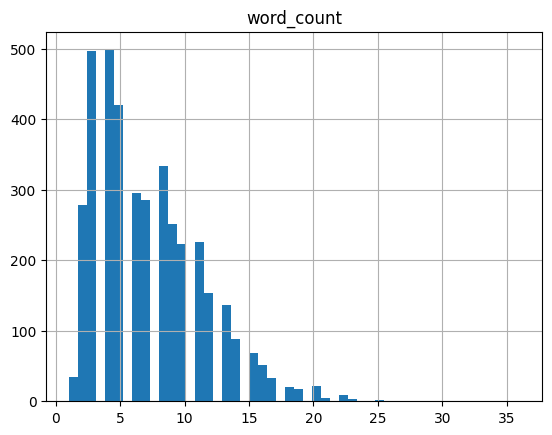

In [15]:
df.hist('word_count',bins=50)

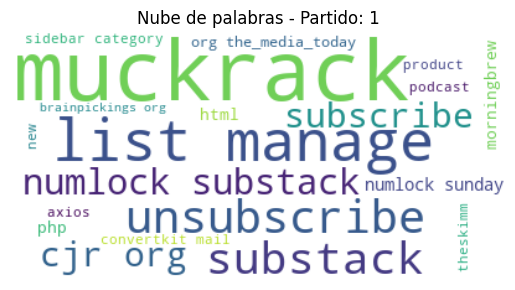

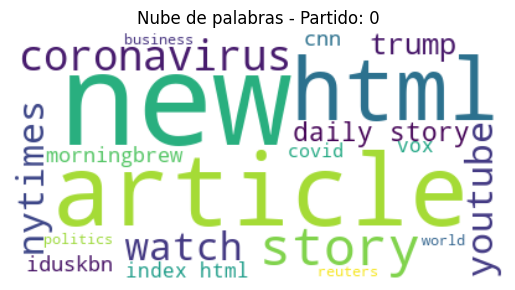

In [16]:
spam_list = df.is_spam.unique()
for x in spam_list:
  text_partido = ' '.join(df[df.is_spam==x]['url'].tolist())
  wordcloud = WordCloud(background_color="white", max_words=20, contour_color="steelblue", collocations=True)
  wordcloud.generate(text_partido)
  # Mostrar la nube de palabras para cada partido
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.title(f"Nube de palabras - Partido: {x}")
  plt.axis("off")
  plt.show()

In [17]:
X = df.drop(['is_spam'],axis=1)

y= df['is_spam']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
x_train_binari=X_train[['contains_subscribe','contains_hash','non_https','contains_?','contains_www']]
x_test_binati =X_test[['contains_subscribe','contains_hash','non_https','contains_?','contains_www']]
vectorizer = TfidfVectorizer()
X_train_tfid = vectorizer.fit_transform(X_train['url'])
X_test_tfid = vectorizer.transform(X_test['url'])

In [19]:
from scipy.sparse import csr_matrix, hstack
X_train_binari_sparse = csr_matrix(x_train_binari)
X_test_binari_sparse = csr_matrix(x_test_binati)
# Combinar las características TF-IDF con las características de sentimiento escaladas
X_train_combined = hstack([X_train_tfid, X_train_binari_sparse])
X_test_combined = hstack([X_test_tfid, X_test_binari_sparse])

In [42]:
clf = LogisticRegression().fit(X_train_combined.toarray(), y_train)
y_pred = clf.predict(X_test_combined.toarray())
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.88      0.85       420
           1       0.85      0.77      0.81       372

    accuracy                           0.83       792
   macro avg       0.83      0.83      0.83       792
weighted avg       0.83      0.83      0.83       792



Probamos el logistic regrecion y tenemos un resultado positivo ahora procederemos a usae el SVC 

In [49]:

modelo_SVC = SVC(kernel = "linear", random_state = 42)
modelo_SVC.fit(X_train_combined.toarray(), y_train)

SVC(kernel='linear', random_state=42)

In [50]:
y_pred_svc = modelo_SVC.predict(X_test_combined.toarray())
print(classification_report(y_test, y_pred_svc))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85       420
           1       0.84      0.81      0.83       372

    accuracy                           0.84       792
   macro avg       0.84      0.84      0.84       792
weighted avg       0.84      0.84      0.84       792



vamos a buscar hiperparametros 

In [52]:
hyperparams = {
    "C": [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    "kernel": ["linear", "poly", "rbf", "sigmoid", "precomputed’"],
    "degree": [1, 2, 3, 4, 5],
    "gamma": ["scale", "auto"]
}

# We initialize the random search
grid = GridSearchCV(modelo_SVC, hyperparams, scoring = "accuracy", cv = 5)
grid.fit(X_train_combined.toarray(), y_train)

print(f"Best hyperparameters: {grid.best_params_}")